In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/데이터 분석 중급반(6기)/데이터

Mounted at /content/drive
/content/drive/MyDrive/데이터 분석 중급반(6기)/데이터


# 1.데이터 설명

- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율'''

In [3]:
boston = pd.read_csv('./Boston_house.csv')

In [4]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


## 데이터 분포 확인

- target과 다른 독립변수들 간의 분포 관계를 통해 변수 선택에 참고
- RM의 경우 target과의 관계가 우상향하는 양의 관계를 보이고, lstat의 경우는 반대로 우하향하는 음의 관계를 보인다
- Age, PTRATIO, INDUS, NOX 또한 약한 우하향 관계를 보인다.
- B와 DIS는 약한 우상향 관계를 보이는 것 같다.

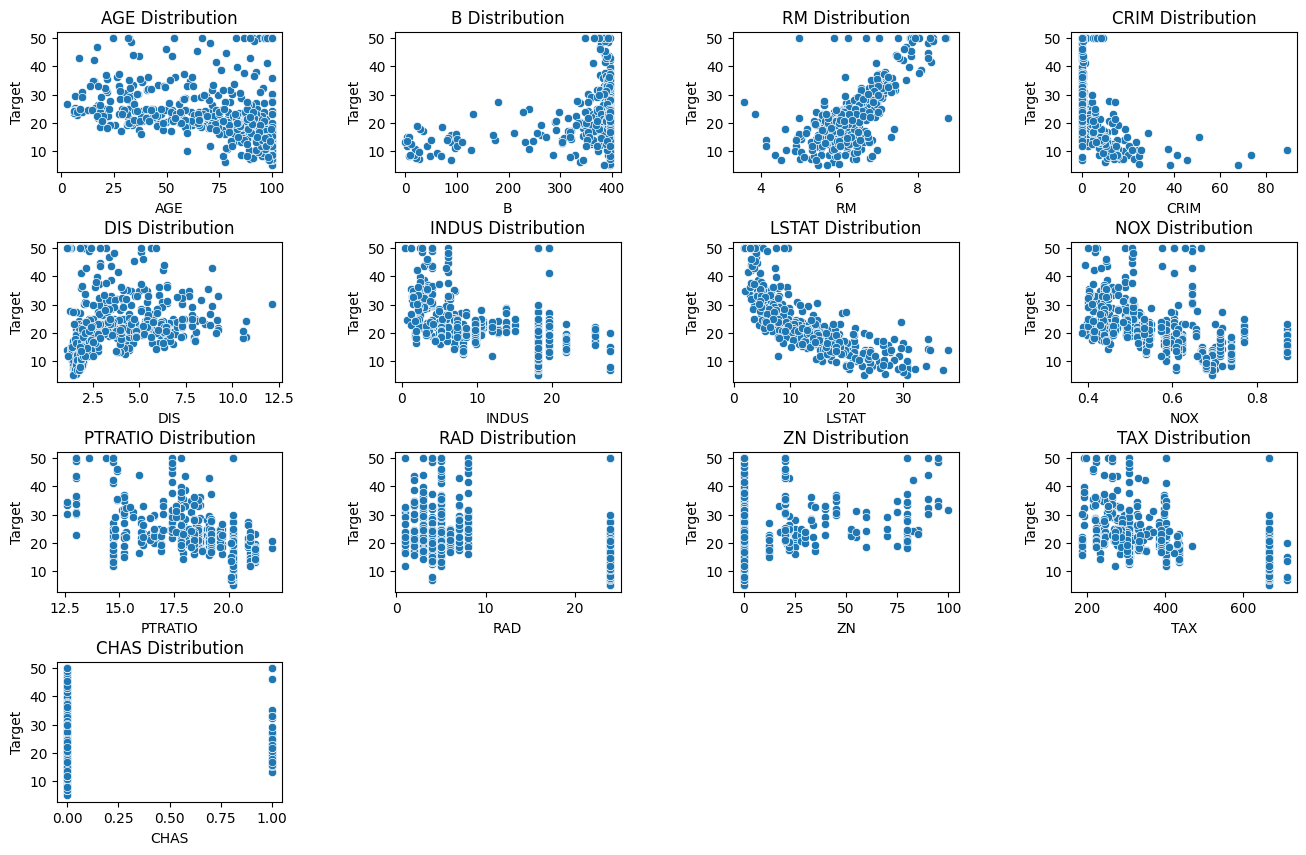

In [5]:
grid = gridspec.GridSpec(4,4)
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.5)


bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

for idx, feature in enumerate(bst_feature):
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x = feature, y='Target', data= boston, ax= ax)
    ax.set_title(f'{feature} Distribution')

## heatmap을 통한 상관관계 확인

<Axes: >

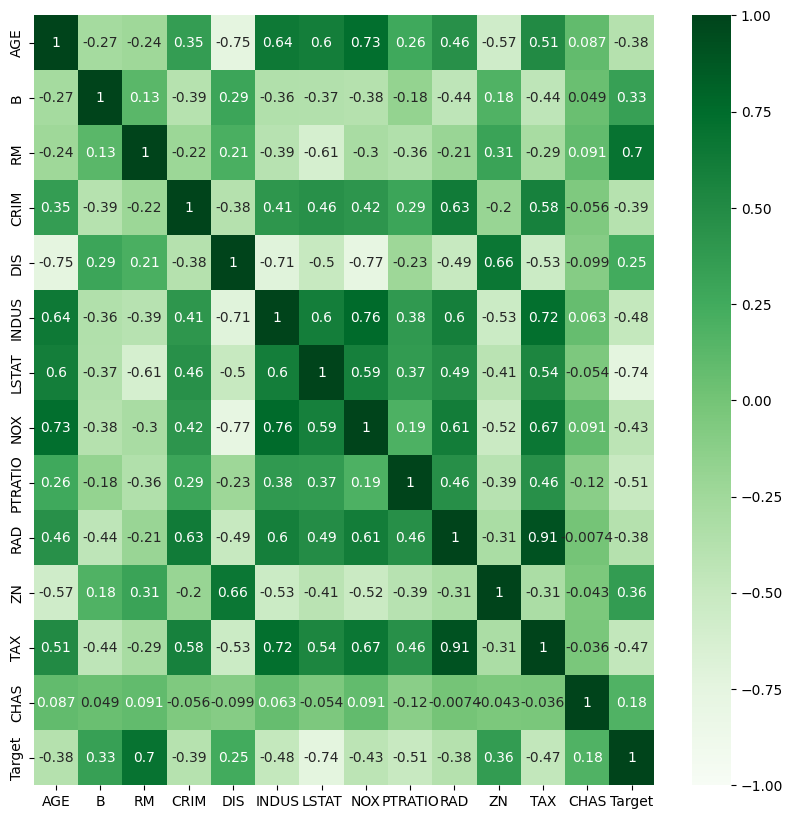

In [6]:
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(boston.corr(), annot= True, cmap= 'Greens', vmin = -1, vmax= 1)

## 첫번째 변수 선택
- CRIM: 범죄율 -> 범죄율이 많으면 사람들의 집에 대한 수요가 감소할 것이라 생각해 집 가격에 영향을 줄 것이라 생각 => 채택

- INDUS: 비소매상업지역 면적 비율 -> 그래프로 봤을 때도 큰 상관관계가 보이는 것 같지 않아 보이고 소매상업지역 여부에 따라 크게 영향을 줄 것 같지도 않아 보임 => 기각

- NOX: 일산화질소 농도 -> 강한 상관관계를 보이는지도 모르겠고 큰 영향을 주는지 잘 모르겠음 => 기각

- RM: 주택당 방 수 -> 강한 상관관계를 보이며 방이 많으면 집이 보통 크기 때문에 가격이 높을 것이라고 생각 => 채택

- LSTAT: 인구 중 하위 계층 비율 -> 강한 음의 상관관계를 보이고 하위 계층이 많이 사는 지역에 대한 사람들의 수요가 적을 것으로 예측 => 채택

- B: 인구 중 흑인 비율 -> 상관관계는 낮지만 인종 차별 문제가 있는 미국에서는 흑인의 비율에 따라 집값에 영향을 줄 것이라고 생각 => 채택

- PTRATIO: 학생/교사 비율 -> 상관계수도 낮지 않은 편이고 학생들이 많은 지역일수록 학교가 잘 발달되어 있어 자식이 있는 부모들의 학교 근처에 대한 집의 수요가 높을 것으로 예상됨 => 채택

- ZN: 25,000 평방피트를 초과 거주지역 비율 -> 그래프를 보면 특정 ZN값에 target이 다양하게 분포하여 상관계수가 낮게 나왔지만 나머지는 전체적으로 우상향하는 것으로 보임 => 채택

- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0 -> 상관관계도 매우 낮고 찰스강 근처에 있다고 해서 가격에 영향을 줄 것으로 보이지는 않음 => 기각

- AGE: 1940년 이전에 건축된 주택의 비율 -> 상관관계도 크지 않고 오래된 건물이 있어도 최근엔 리모델링 등을 통해서 오래된 집에서도 잘 살 수 있기 때문에 큰 영향을 줄 것으로 보이지 않음 => 기각

- RAD: 방사형 고속도로까지의 거리 -> 큰 상관관계도 보이지 않고 방사형 고속도로의 거리와는 크게 영향을 줄 것으로 보이지 않음 => 기각

- DIS: 직업센터의 거리 -> 상관계수도 낮고 직업센터의 거리가 크게 영향을 줄 것으로 보이지도 않음 => 기각

- TAX: 재산세율 -> 마찬가지로 세금과 집값의 영향은 크게 보이지 않음 => 기각

#### 최종 선택 변수들
- CRIM, RM, LSTAT, B, PTRATIO

# 2.OLS

In [7]:
cols = ['CRIM', "RM", "LSTAT","B","PTRATIO"]

In [8]:
model=sm.OLS.from_formula('Target~'+'+'.join(cols), data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          3.39e-124
Time:                        11:15:08   Log-Likelihood:                -1545.0
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     500   BIC:                             3127.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6150      4.232      2.744      0.006       3.300      19.931
CRIM          -0.0389      0.031     -1.237      0.217      -0.101       0.023
RM             4.7882      0.426     11.249      0.000       3.952       5.624
LSTAT         -0.4951      0.047    -10.624      0.000      -0.587      -0.404
B              0.0096      0.003      3.402      0.001       0.004       0.015
PTRATIO       -0.8772      0.118     -7.457      0.000      -1.108      -0.646
==============================================================================
Omnibus:                      235.363   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1456.259
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      10.335   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- CRIM의 p-value가 높게 나옴
- CRIM을 제거한 후 결과와 비교

In [9]:
model=sm.OLS.from_formula('Target~'+'+'.join(cols[1:]), data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     275.9
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          4.10e-125
Time:                        11:15:08   Log-Likelihood:                -1545.8
No. Observations:                 506   AIC:                             3102.
Df Residuals:                     501   BIC:                             3123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0548      4.220      2.857      0.004       3.764      20.345
RM             4.7458      0.424     11.180      0.000       3.912       5.580
LSTAT         -0.5125      0.044    -11.530      0.000      -0.600      -0.425
B              0.0105      0.003      3.826      0.000       0.005       0.016
PTRATIO       -0.8990      0.116     -7.725      0.000      -1.128      -0.670
==============================================================================
Omnibus:                      225.637   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1341.814
Skew:                           1.871   Prob(JB):                    4.25e-292
Kurtosis:                      10.046   Cond. No.                     6.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 오히려 CRIM을 제거했을 때의 R2가 감소하였음
- 따라서 제거하기보단 그대로 유지하는 것이 나아보임

## VIF확인

In [10]:
boston2 = boston.loc[:,cols]

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(boston2, i) for i in range(boston2.shape[1])]
vif['features'] = boston2.columns
vif = vif.sort_values('VIF factor').reset_index(drop=True)
vif

,VIF factor,features
0,1.625697,CRIM
1,6.678807,LSTAT
2,17.715559,B
3,42.218298,RM
4,56.012324,PTRATIO


- vif값이 10 이상인 변수들이 많음
- scaling 후 다시 확인

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
boston_lg1=np.log1p(boston[['B','CRIM']]) # log


scaler.fit(boston[['RM','LSTAT','PTRATIO']]) # standardscaler
boston_sc1 =scaler.transform(boston[['RM','LSTAT','PTRATIO']])
boston_sc1= pd.DataFrame(boston_sc1,columns=['RM','LSTAT','PTRATIO'])

In [14]:
boston_scaled = pd.concat([boston_lg1, boston_sc1], axis = 1)
boston_scaled = pd.DataFrame(boston_scaled, columns= cols)

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(boston_scaled, i) for i in range(boston_scaled.shape[1])]
vif['features'] = boston_scaled.columns
vif = vif.sort_values('VIF factor').reset_index(drop=True)
vif

,VIF factor,features
0,1.278342,PTRATIO
1,1.715121,RM
2,1.918645,B
3,2.397979,LSTAT
4,2.580204,CRIM


## OLS 다시 확인

In [16]:
boston_scaled['Target'] = np.log1p(boston['Target'])

## 1) 독립성

In [17]:
model=sm.OLS.from_formula('Target~'+'+'.join(cols[1:]), data=boston_scaled)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     343.0
Date:                Sat, 01 Jul 2023   Prob (F-statistic):          6.45e-142
Time:                        11:15:08   Log-Likelihood:                 96.541
No. Observations:                 506   AIC:                            -183.1
Df Residuals:                     501   BIC:                            -161.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6740      0.075     35.473      0.000       2.526       2.822
RM             0.0821      0.012      7.073      0.000       0.059       0.105
LSTAT         -0.2172      0.012    -17.990      0.000      -0.241      -0.193
B              0.0714      0.013      5.497      0.000       0.046       0.097
PTRATIO       -0.0751      0.010     -7.645      0.000      -0.094      -0.056
==============================================================================
Omnibus:                       63.941   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.096
Skew:                           0.429   Prob(JB):                     4.15e-66
Kurtosis:                       6.680   Cond. No.                         50.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 독립성은 Durbin-Watson을 통해 확인할 수 있는데 1.5~2.5 사이이면 독립으로 판단하고 회귀모형을 적합하다고 한다
- 하지만 위의 결과의 경우 0.909로 독립성이 있다고 판단하기는 어렵다

## 2) 정규성 확인(qqplot)
- 정규성에 가까우려면 그래프의 빨간색 직선을 따라 파란색 점들이 배치되어 있어야 한다
- 하지만 양 끝단에서 파란색 점들이 빨간색 직선에서 멀리 떨어져있다는 것을 확인할 수 있다

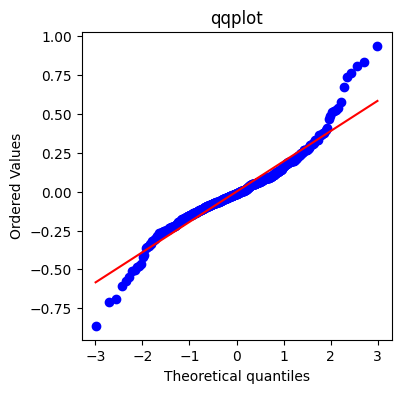

In [18]:
from scipy.stats import probplot

fig = plt.figure(figsize=(4,4))
fig.set_facecolor('white')

ax = fig.add_subplot()
probplot(res.resid, dist='norm',plot=ax) ## qq plot 출력
plt.title("qqplot")
plt.show()

## 3) 선형성
- 예측값과 잔차를 비교해 모든 예측값에서 가운데 점선에 맞추어 잔차가 비슷하게 있어야 한다
- 빨간 실선은 잔차의 추세로 점선에서 크게 벗어나면 예측값에 따라 잔차가 크게 달라지는 것으로 선형성이 없다

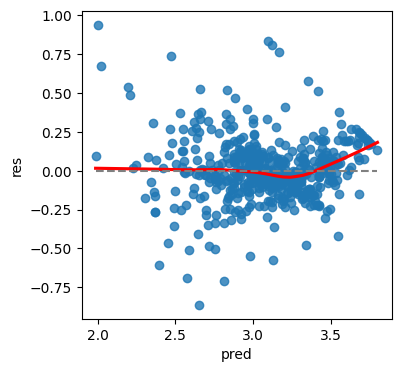

In [29]:
boston_scaled['pred'] = res.predict(boston_scaled)
boston_scaled['res'] = boston_scaled['Target'] - boston_scaled['pred']

plt.figure(figsize=(4,4))
sns.regplot(x = 'pred', y = 'res', data = boston_scaled, lowess = True, line_kws = {'color' : 'red'})
plt.plot([boston_scaled['pred'].min(), boston_scaled['pred'].max()], [0,0], '--', color = 'grey')

## 3) 등분산성
- 회귀모형을 통해 예측된 값이 어떻든지 모든 값들에 대해 잔차의 분산이 동일하다는 가정이다
- 빨간색 실선이 수평선에 가까울수록 등분산성이 존재하다는 것이다

<Axes: xlabel='pred', ylabel='sr'>

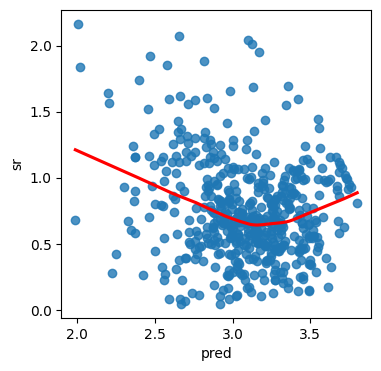

In [32]:
import scipy.stats
plt.figure(figsize=(4,4))
boston_scaled['sr'] = np.sqrt(np.abs(scipy.stats.zscore(boston_scaled['res'])))
sns.regplot(x = 'pred', y = 'sr', data = boston_scaled, lowess = True, line_kws = {"color" : 'red'})

## RMSE

In [117]:
from sklearn.metrics import mean_squared_error
pred = res.predict(boston_scaled)

# RMSE 계산
rmse = mean_squared_error(boston_scaled['Target'], pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.19994134823597842


# 3. KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import numpy as np

from sklearn import neighbors

In [20]:
X_train, X_test, y_train, y_test = train_test_split(boston_scaled.drop('Target', axis =1), boston_scaled['Target'], test_size = 0.2)

## RMSE

In [21]:
rmse_val =[]
for K in range(1,20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val))

RMSE value k 2 = 0.1924570230519392
RMSE value k 3 = 0.17322197109158713
RMSE value k 4 = 0.16005405071646192
RMSE value k 5 = 0.15307205208346064
RMSE value k 6 = 0.1521237428549799
RMSE value k 7 = 0.15066139409346715
RMSE value k 8 = 0.14518664498963552
RMSE value k 9 = 0.1468104486176712
RMSE value k 10 = 0.14545729123920428
RMSE value k 11 = 0.1420591237754023
RMSE value k 12 = 0.1427020175488876
RMSE value k 13 = 0.14216555126540495
RMSE value k 14 = 0.14665368257874675
RMSE value k 15 = 0.14690646101161128
RMSE value k 16 = 0.14621519077486003
RMSE value k 17 = 0.14805902565715437
RMSE value k 18 = 0.1509162629655686
RMSE value k 19 = 0.15245893810667985
RMSE value k 20 = 0.15204507251351246
가장최소 rmse 0.1420591237754023


In [22]:
#민코프스키 거리
rmse_val =[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K,weights='distance',p=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k',K,'=',error)
print('가장최소 rmse',min(rmse_val))

RMSE value k 1 = 0.18931555687861157
RMSE value k 2 = 0.18522836556329125
RMSE value k 3 = 0.1701631694381028
RMSE value k 4 = 0.16377599168294624
RMSE value k 5 = 0.15825067336402776
RMSE value k 6 = 0.15343053116129424
RMSE value k 7 = 0.1561219144996667
RMSE value k 8 = 0.15482915268996658
RMSE value k 9 = 0.14920962711520674
RMSE value k 10 = 0.14585748159838507
RMSE value k 11 = 0.147134623328425
RMSE value k 12 = 0.14729679317349909
RMSE value k 13 = 0.14846552610918068
RMSE value k 14 = 0.14770085424502744
RMSE value k 15 = 0.14808458428009824
RMSE value k 16 = 0.14726010839043244
RMSE value k 17 = 0.14743729527368538
RMSE value k 18 = 0.14916268716609382
RMSE value k 19 = 0.1487218988880819
RMSE value k 20 = 0.1488430760528123
가장최소 rmse 0.14585748159838507
